## Anscombe Dataset. A research.

### Francis John Anscombe

Francis John Anscombe (13 May 1918 – 17 October 2001)was an English statistician renowned for his works on randomisation, analysis of variance (Anscombre transform, used to stabilise Standard Deviation in Poisson distributions is named after him) and computer statistics.

### Anscombe dataset

This is a well-known data set, firstly 

The Anscombe data set consists of 4 different sets of (x,y) values, with esentially identical values for:

- mean of x
- variance of x
- mean of y
- variance of y
- correlation between x and y
- linear regression intercept and slope

Each dataset has a series of x values and dependent y values.

In [17]:
import matplotlib.pyplot as plt
import numpy as np


# Importing dataset from csv file using pandas
import pandas as pd
data = pd.read_csv("anscombe.csv")
print (data)


    x1  x2  x3  x4     y1    y2     y3     y4
0   10  10  10   8   8.04  9.14   7.46   6.58
1    8   8   8   8   6.95  8.14   6.77   5.76
2   13  13  13   8   7.58  8.74  12.74   7.71
3    9   9   9   8   8.81  8.77   7.11   8.84
4   11  11  11   8   8.33  9.26   7.81   8.47
5   14  14  14   8   9.96  8.10   8.84   7.04
6    6   6   6   8   7.24  6.13   6.08   5.25
7    4   4   4  19   4.26  3.10   5.39  12.50
8   12  12  12   8  10.84  9.13   8.15   5.56
9    7   7   7   8   4.82  7.26   6.42   7.91
10   5   5   5   8   5.68  4.74   5.73   6.89


### Obtaining summary statistics of the data set

In [58]:
# Transforming dataset into DataFrame and describing its components
df = pd.DataFrame(data)
print (df.describe())

# df.corr(['x1'],['y1'])
corr1 = df.corr()['x1']['y1']

#df.corr()['x1']['y1']
#set1=df.loc['x1']['y1']

set1=df.loc[:, ['x1', 'y1']]

print (set1)
print ("Correlation coeficient: ",corr1)
#df.corr(['x1'],['y1'])

              x1         x2         x3         x4         y1         y2  \
count  11.000000  11.000000  11.000000  11.000000  11.000000  11.000000   
mean    9.000000   9.000000   9.000000   9.000000   7.500909   7.500909   
std     3.316625   3.316625   3.316625   3.316625   2.031568   2.031657   
min     4.000000   4.000000   4.000000   8.000000   4.260000   3.100000   
25%     6.500000   6.500000   6.500000   8.000000   6.315000   6.695000   
50%     9.000000   9.000000   9.000000   8.000000   7.580000   8.140000   
75%    11.500000  11.500000  11.500000   8.000000   8.570000   8.950000   
max    14.000000  14.000000  14.000000  19.000000  10.840000   9.260000   

              y3         y4  
count  11.000000  11.000000  
mean    7.500000   7.500909  
std     2.030424   2.030579  
min     5.390000   5.250000  
25%     6.250000   6.170000  
50%     7.110000   7.040000  
75%     7.980000   8.190000  
max    12.740000  12.500000  
    x1     y1
0   10   8.04
1    8   6.95
2   13   7.5

### Graphical Representation



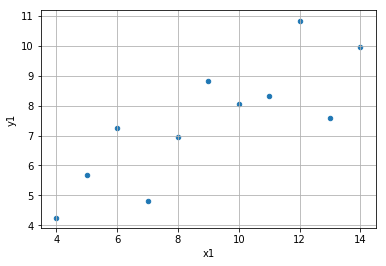

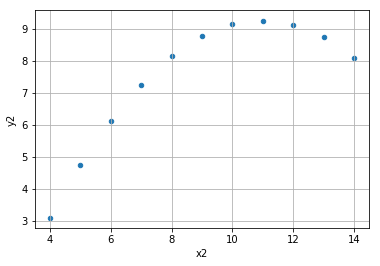

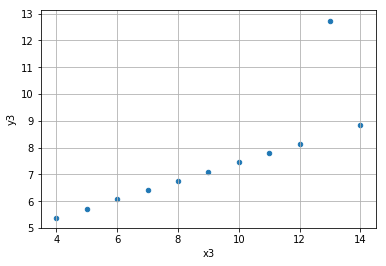

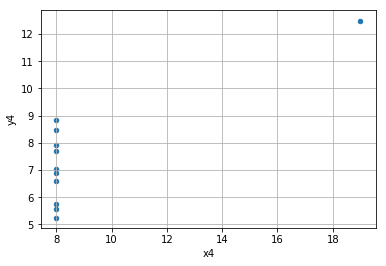

In [69]:

# Plotting the four series of data in a scatter plot
df.plot.scatter('x1','y1',grid=True, subplots=True, sharey=True, layout=(1,1))
df.plot.scatter('x2','y2',grid=True)
df.plot.scatter('x3','y3',grid=True)
df.plot.scatter('x4','y4',grid=True)


# Importing seaborn for plotting
import seaborn as sns


'\nax2.set_xlabel(\'sample\')\nax2.set_ylabel(\'cumulative sum\')\nax2.set_title("Normal distrubution")\nplt.tight_layout()\n'

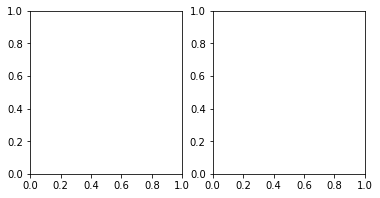

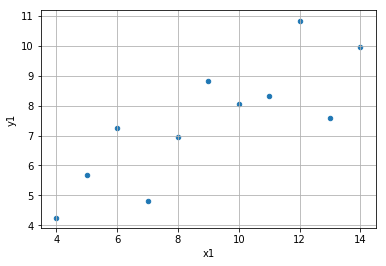

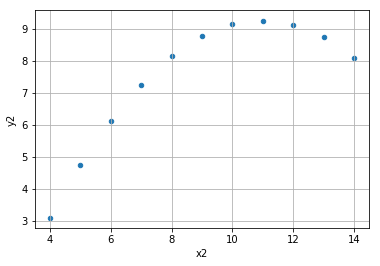

In [77]:
fig = plt.figure(figsize=(6,3))
ax1 = fig.add_subplot(121)
#ax1.set_xlabel('some random numbers')
#ax1.set_ylabel('more random numbers')
#ax1.set_title("Random scatterplot")
df.plot.scatter('x1','y1',grid=True)
ax2 = fig.add_subplot(122)
df.plot.scatter('x2','y2',grid=True)
#plt.hist(np.random.normal(size=100), bins=15)
'''
ax2.set_xlabel('sample')
ax2.set_ylabel('cumulative sum')
ax2.set_title("Normal distrubution")
plt.tight_layout()
'''